In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

plt.style.use("dark_background")

In [52]:
def get_alpha_blend_cmap(cmap, alpha):
    cls = plt.get_cmap(cmap)(np.linspace(0,1,256))
    cls = (1-alpha) + alpha*cls
    return ListedColormap(cls)

In [53]:
listings_df = pd.read_csv('../data/processed/processed_listings.csv')

In [54]:
ordinal_cols = []
one_hot_cols = ['location', 'subtype']
numerical_cols = ['living_area', 'bedrooms', 'bathrooms', 'levels', 'yard_area', 'age', 'listing_year']
target_col = ['price']

In [55]:
listings_df = listings_df[ordinal_cols + one_hot_cols + numerical_cols + target_col]

In [56]:
listings_df.head()

,location,subtype,living_area,bedrooms,bathrooms,levels,yard_area,age,listing_year,price
0,Capitale-Nationale,2 Storey,1191,3,1,2,2885,16,2020,332500
1,Mauricie,Bungalow,1261,2,1,1,8239,64,2021,265000
2,Lachine,Townhouse,1645,3,1,3,0,15,2021,612000
3,Capitale-Nationale,Bi-generation,2024,4,3,1,14976,2,2021,526500
4,Outaouais,Semi-detached,2400,4,2,2,2071,32,2021,360000


In [57]:
def plot_corr_map(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(0, 100, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, vmax=.3, cmap=get_alpha_blend_cmap("rocket_r", 0.9), center=0,
                square=True, linewidths=0, cbar_kws={"shrink": .5})

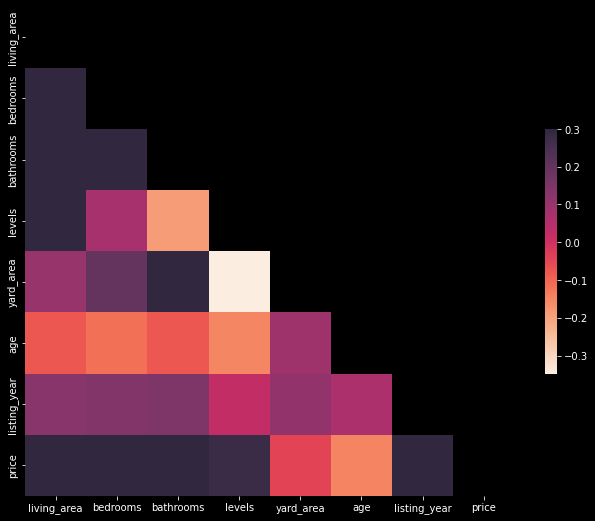

In [58]:
plot_corr_map(listings_df)

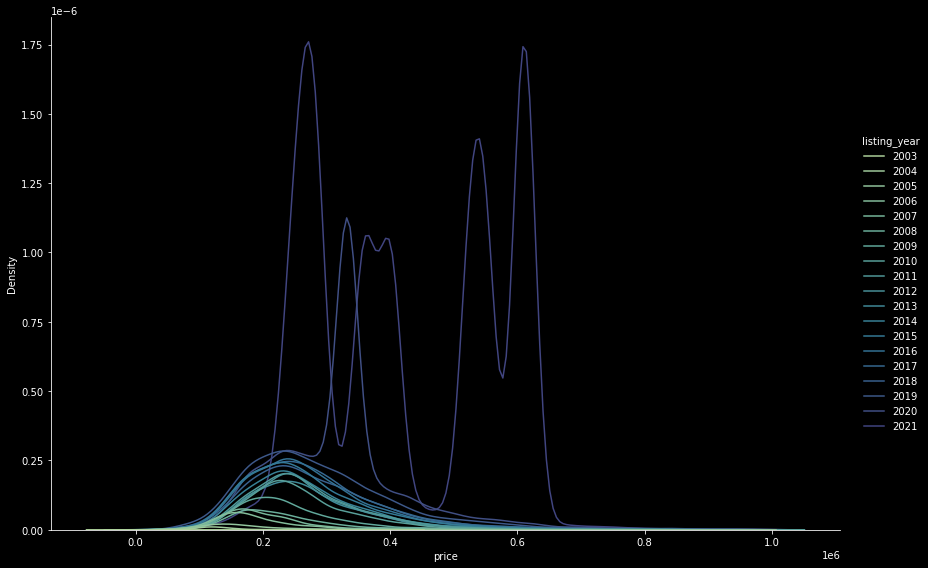

In [96]:

sns.displot(listings_df, x='price', hue='listing_year', kind="kde", height=8, aspect=1.5, palette=get_alpha_blend_cmap("crest", 0.9), common_norm=True)

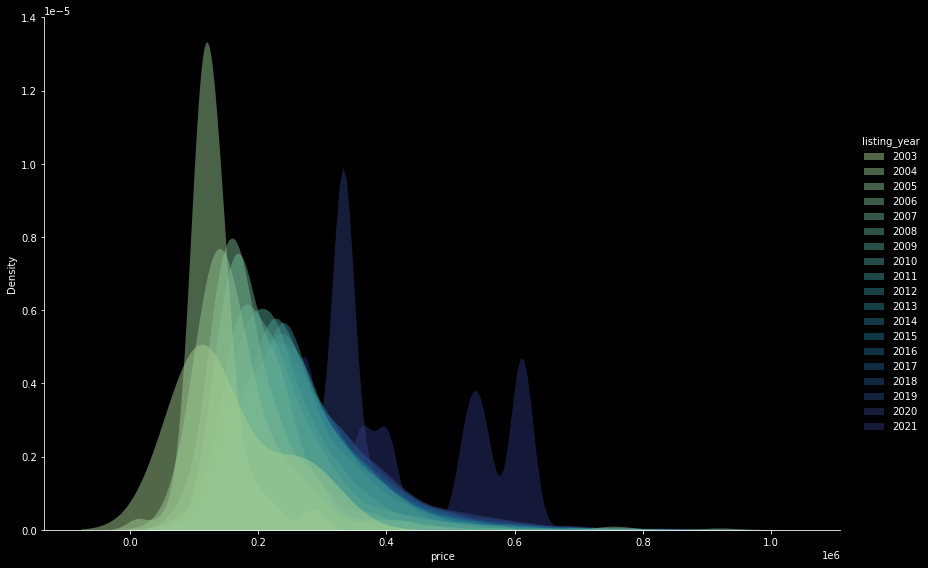

In [95]:
sns.displot(data=listings_df, x='price', hue='listing_year', kind='kde', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, height=8, aspect=1.5)

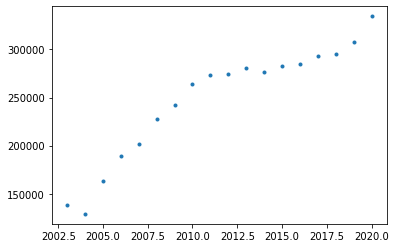

In [69]:
mean_prices = []

min_y = min(listings_df['year'].unique())
max_y = max(listings_df['year'].unique())
years = range(min_y, max_y)

for y in years:
    mean_prices.append(listings_df[listings_df['year'] == y]['price'].mean())

plt.figure()
plt.plot(years, mean_prices, '.')


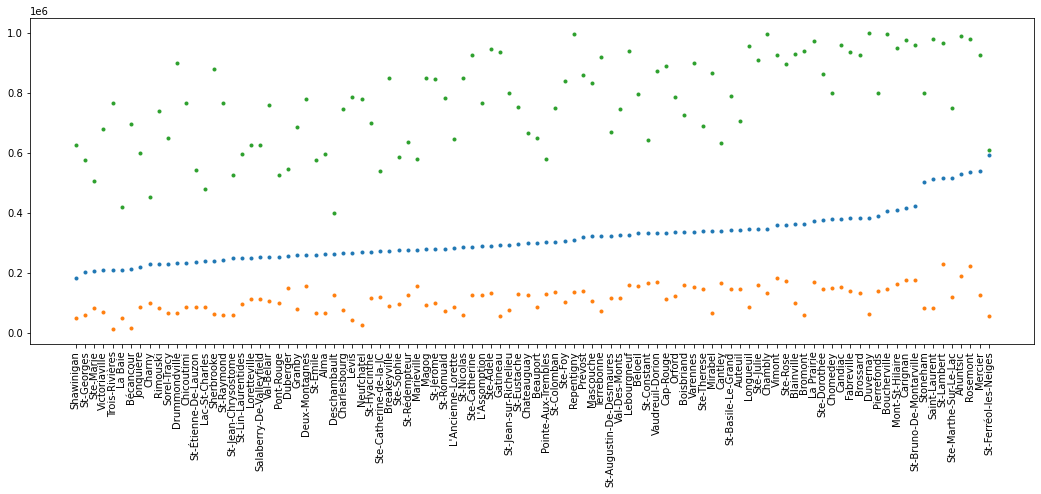

In [97]:
mean_prices = []
min_prices = []
max_prices = []

locations = listings_df['location'].unique()

for y in locations:
    prices = listings_df[listings_df['location'] == y]['price']
    mean_prices.append(int(prices.mean()))
    min_prices.append(int(prices.min()))
    max_prices.append(int(prices.max()))

mean_prices = np.array(mean_prices)
min_prices = np.array(min_prices)
max_prices = np.array(max_prices)

ind_sort = np.argsort(mean_prices)

plt.figure(figsize=(18, 6))
plt.xticks(rotation='vertical')
plt.plot(locations[ind_sort], mean_prices[ind_sort], '.', min_prices[ind_sort], '.', max_prices[ind_sort], '.')